# Feature Engineering (FE) & EDA 

This is a loan default dataset than contains infromation about the applicate, credict bureau, call detail and credit center and the default records. We will prepare the data for the model in this report.

# Table of Contents <a class="anchor" id="0"></a>
- <b>[1. Data Preparation](#1)</b>
- <b>[2. EDA](#2)</b>
  - [2.1 Applicate Variables](#21)
  - [2.2 Credit Bureau Variables](#22)
  - [2.3 Call Detail Variables](#23)
  - [2.4 Credit Center Variables](#24)
- <b>[3. Feature Engineering](#3)</b>
  - [3.1 Binning the numerical variables](#31)
  - [3.2 WOE Transformation for Categorical Variables](#32)
  - [3.3 FE for Test Set](#33)
- <b>[4. Building a simple decision tree model](#4)</b>
  - [4.1 Decision Tree Model before WOE](#41)
  - [4.2 Decision Tree Model after WOE](#42)
- <b>[5. Conclusion](#5)</b>
  - [5.1 Why WOE Transformation Enhanced the Model](#51)
  - [5.2 Insight of Features and Models](#52)

       
  <p>&nbsp;</p>

## 1. Data Preparation <a class="anchor" id="1"></a>

In [1]:
import numpy as np
import pandas as pd
path = '/Users/mac/Downloads/' 
df = pd.read_csv(path + 'XYZloan_default_selected_vars.csv')  
df.tail()

,Unnamed: 0.1,Unnamed: 0,id,loan_default,AP001,AP002,AP003,AP004,AP005,AP006,...,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005,MB007
79995,79995,79996,79996,0,39,2,1,12,2017/5/7 13:44,android,...,15.0,8.0,864.0,684.0,1261.0,764.0,2600.0,1074.0,11.0,OPPO
79996,79996,79997,79997,0,31,1,4,12,2017/6/2 15:54,ios,...,25.0,25.0,6177.0,6177.0,6426.0,6426.0,6426.0,6426.0,6.0,IPHONE7
79997,79997,79998,79998,0,37,1,1,12,2017/7/9 8:40,android,...,14.0,13.0,1116.0,1116.0,2061.0,2061.0,2501.0,2061.0,12.0,VIVO
79998,79998,79999,79999,0,38,2,1,12,2017/5/9 10:19,android,...,5.0,2.0,25.0,0.0,498.0,343.0,514.0,343.0,6.0,XIAOMI
79999,79999,80000,80000,1,25,1,3,12,2017/4/27 18:36,h5,...,9.0,9.0,129.0,129.0,167.0,167.0,167.0,167.0,7.0,WEB


In [2]:
print(df.shape)
print(df.columns) # check column names
df.describe() # Get the Simple Summary Statistics 

(80000, 89)
Index(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'loan_default', 'AP001', 'AP002',
       'AP003', 'AP004', 'AP005', 'AP006', 'AP007', 'AP008', 'AP009', 'TD001',
       'TD002', 'TD005', 'TD006', 'TD009', 'TD010', 'TD013', 'TD014', 'TD015',
       'TD022', 'TD023', 'TD024', 'TD025', 'TD026', 'TD027', 'TD028', 'TD029',
       'TD044', 'TD048', 'TD051', 'TD054', 'TD055', 'TD061', 'TD062', 'CR004',
       'CR005', 'CR009', 'CR012', 'CR015', 'CR017', 'CR018', 'CR019', 'PA022',
       'PA023', 'PA028', 'PA029', 'PA030', 'PA031', 'CD008', 'CD018', 'CD071',
       'CD072', 'CD088', 'CD100', 'CD101', 'CD106', 'CD107', 'CD108', 'CD113',
       'CD114', 'CD115', 'CD117', 'CD118', 'CD120', 'CD121', 'CD123', 'CD130',
       'CD131', 'CD132', 'CD133', 'CD135', 'CD136', 'CD137', 'CD152', 'CD153',
       'CD160', 'CD162', 'CD164', 'CD166', 'CD167', 'CD169', 'CD170', 'CD172',
       'CD173', 'MB005', 'MB007'],
      dtype='object')


,Unnamed: 0.1,Unnamed: 0,id,loan_default,AP001,AP002,AP003,AP004,AP007,AP008,...,CD160,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.00000,80000.000000,...,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.00000,79619.000000,79619.000000,77207.000000
mean,39999.500000,40000.500000,40000.500000,0.193600,31.706913,1.321813,2.014925,11.235413,3.30130,3.117200,...,6.911956,14.271694,11.773358,909.089313,810.786219,1732.693314,1539.33443,2513.226491,2229.606137,5.976272
std,23094.155105,23094.155105,23094.155105,0.395121,7.075070,0.467174,1.196806,2.212313,1.33655,1.306335,...,28.007499,38.235012,33.270641,1379.553332,1245.044602,2441.503517,2172.71384,3404.975112,3005.615048,3.641814
min,0.000000,1.000000,1.000000,0.000000,20.000000,1.000000,1.000000,3.000000,1.00000,1.000000,...,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.00000,-99.000000,-99.000000,0.000000
25%,19999.750000,20000.750000,20000.750000,0.000000,27.000000,1.000000,1.000000,12.000000,2.00000,2.000000,...,2.000000,5.000000,4.000000,84.000000,34.000000,309.000000,226.00000,539.000000,414.000000,3.000000
50%,39999.500000,40000.500000,40000.500000,0.000000,30.000000,1.000000,1.000000,12.000000,3.00000,3.000000,...,7.000000,12.000000,10.000000,475.000000,397.000000,1023.000000,870.00000,1553.000000,1324.000000,5.000000
75%,59999.250000,60000.250000,60000.250000,0.000000,35.000000,2.000000,3.000000,12.000000,5.00000,4.000000,...,14.000000,23.000000,20.000000,1209.000000,1080.000000,2287.000000,2030.00000,3296.000000,2936.000000,8.000000
max,79999.000000,80000.000000,80000.000000,1.000000,56.000000,2.000000,6.000000,12.000000,5.00000,5.000000,...,1061.000000,2792.000000,1579.000000,48585.000000,29664.000000,88364.000000,54651.00000,125352.000000,87312.000000,47.000000


The dataset has 80000 rows and 89 columns. Subset the variables for analyzing.

In [3]:
# Select the columns for analysing from original dataset
df_cut = df[['loan_default',
             'AP001','AP003','AP008',
             'CR009','CR015','CR019',
             'PA022','PA023','PA029',
             'TD001','TD005','TD006','TD009','TD010','TD014']]
df_cut.head(5)

,loan_default,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,PA029,TD001,TD005,TD006,TD009,TD010,TD014
0,1,31,1,3,35807,4,2,-1.0,-1.0,-98.0,1,4,1,5,1,2
1,0,27,1,4,7254,6,11,-1.0,-1.0,-98.0,2,3,1,3,1,2
2,0,33,4,2,30377,2,3,-1.0,-1.0,-98.0,2,4,1,5,1,1
3,0,34,4,5,0,5,8,-1.0,-1.0,-98.0,0,0,0,0,0,1
4,0,47,1,4,0,6,11,-99.0,-99.0,-99.0,2,2,1,2,1,1


In [4]:
# Check for missing values
missing_values = df_cut.isnull().sum()
missing_values_per = (df_cut.isnull().sum() / df_cut.isnull().count())
pd.concat([missing_values, missing_values_per],axis=1, keys = ['Count_of_Missing','Percentage'])

,Count_of_Missing,Percentage
loan_default,0,0.000000
AP001,0,0.000000
AP003,0,0.000000
AP008,0,0.000000
CR009,0,0.000000
CR015,0,0.000000
CR019,0,0.000000
PA022,381,0.004763
PA023,381,0.004763
PA029,381,0.004763


Variable PA022, PA023, and PA029 have missing values. we should encode them later in the feature engineering.  

Then, split the dataset into "train" and "test" dataset for future training.

In [5]:
features = ['AP001','AP003','AP008',
            'CR009','CR015','CR019',
            'PA022','PA023','PA029',
            'TD001','TD005','TD006','TD009','TD010','TD014']

# Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df_cut[features],
                                                    df_cut['loan_default'], 
                                                    random_state=0)
# Merge train sets
train = pd.merge(Y_train, X_train, left_index=True, right_index=True)
print("The dimension of train dataset is", train.shape)
train.head()

The dimension of train dataset is (60000, 16)


,loan_default,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,PA029,TD001,TD005,TD006,TD009,TD010,TD014
69120,0,24,3,1,0,3,3,-1.0,-1.0,-98.0,2,2,1,2,1,1
78784,0,28,3,5,28200,5,4,-1.0,-1.0,-98.0,1,6,2,12,3,5
23858,0,27,4,3,606,6,12,-1.0,-1.0,-98.0,3,3,1,5,2,3
5063,0,31,1,2,18000,5,12,-1.0,-1.0,-98.0,6,6,1,8,1,1
63511,0,44,1,5,1500,4,3,-1.0,-1.0,-98.0,2,4,1,5,1,1


In [6]:
# Merge the test sets
test = pd.merge(Y_test, X_test, left_index=True, right_index=True)
print("The dimension of test dataset is", test.shape)
test.head()

The dimension of test dataset is (20000, 16)


,loan_default,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,PA029,TD001,TD005,TD006,TD009,TD010,TD014
7389,0,28,3,2,5500,4,7,12.0,12.0,74.0,2,2,2,2,2,2
3509,0,25,3,4,17387,4,2,-1.0,-1.0,-98.0,2,5,1,7,1,1
30661,0,39,1,3,115900,5,6,-1.0,-1.0,-98.0,0,2,2,3,2,2
63191,0,28,3,5,12100,6,1,-1.0,-1.0,-98.0,4,5,1,6,1,4
38241,1,31,1,4,51700,5,12,-1.0,-1.0,-98.0,0,2,0,7,3,4


#### [Back to the top](#0)

## 2. EDA <a class="anchor" id="2"></a>
### 2.1 Applicate Variables <a class="anchor" id="21"></a>
#### 2.1.1 AP001 YR_AGE
AP001 is numeric variable and refers to the age of applicants.

In [7]:
train.AP001.describe()

count    60000.000000
mean        31.692400
std          7.078459
min         20.000000
25%         27.000000
50%         30.000000
75%         35.000000
max         56.000000
Name: AP001, dtype: float64

[Text(0.5, 1.0, 'Figure 2.1.1 The distribution of AP001(YR_AGE)'),
 Text(0.5, 0, 'AP001(YR_AGE)')]

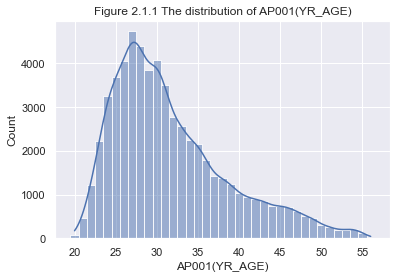

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

# The distribution of AP001
sns.histplot(train['AP001'], discrete=True, kde=True).\
    set(title='Figure 2.1.1 The distribution of AP001(YR_AGE)', xlabel='AP001(YR_AGE)')

[Text(0.5, 1.0, 'Figure 2.1.2 The stacked distribution of loan_default by AP001(YR_AGE)'),
 Text(0.5, 0, 'AP001(YR_AGE)')]

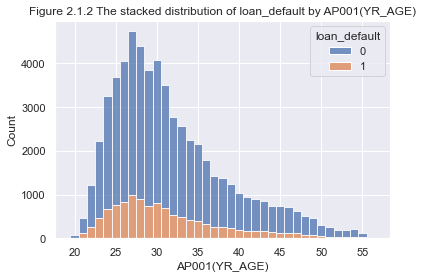

In [9]:
# The distribution of AP001 and loan_default

sns.histplot(data=train, x='AP001', hue='loan_default', multiple='stack', discrete=True).\
    set(title='Figure 2.1.2 The stacked distribution of loan_default by AP001(YR_AGE)', xlabel='AP001(YR_AGE)')

Insights:
1. According to figure 2.1.1, the age of applicants ranges from 20 to 56. Most of the applicants are 23-35 years old.
2. According to figure 2.1.2, the distributions of age are similar for apllicants with and without loan default.

#### [Back to the top](#0)

#### 2.1.2 AP003 CODE_EDUCATION
AP003 refers to the education level/code of applicants. It is a categorical variable with 6 levels.

In [10]:
train.AP003.value_counts()

1    33820
3    17874
4     8121
5      174
6       11
Name: AP003, dtype: int64

[Text(0.5, 1.0, 'Figure 2.1.3 The distribution of AP003(CODE_EDUCATION)'),
 Text(0.5, 0, 'AP003(CODE_EDUCATION)')]

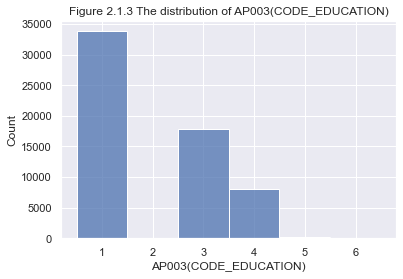

In [11]:
sns.set(style="darkgrid")

# The distribution of AP003
sns.histplot(train['AP003'], discrete=True).\
    set(title='Figure 2.1.3 The distribution of AP003(CODE_EDUCATION)', xlabel='AP003(CODE_EDUCATION)')

[Text(0.5, 1.0, 'Figure 2.1.4 The stacked distribution of loan_default by AP003(CODE_EDUCATION)'),
 Text(0.5, 0, 'AP003(CODE_EDUCATION)')]

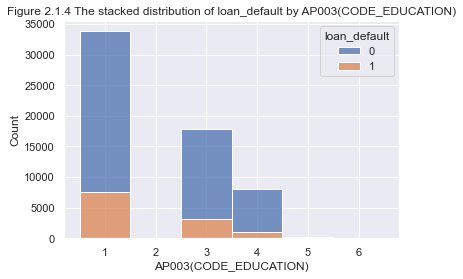

In [12]:
# The distribution of AP003 and loan_default
sns.histplot(data=train, x='AP003', hue='loan_default', multiple='stack', discrete=True).\
    set(title='Figure 2.1.4 The stacked distribution of loan_default by AP003(CODE_EDUCATION)', xlabel='AP003(CODE_EDUCATION)')

Insights:  
1. Figure 2.1.3 shows that the most of applicants reach education level 1 and the other reach education level 3&4.  
2. Figure 2.1.4 shows that the rank of education level are similar for apllicants with and without loan default. 

#### [Back to the top](#0)

#### 2.1.3 AP008 FLAG_IP_CITY_NOT_APPL_CITY
AP008 refers to the city of the IP address where the credit card was flagged. It is a categorical variable with 5 levels.

In [13]:
train.AP008.value_counts()

2    16442
3    13808
5    12625
4    10750
1     6375
Name: AP008, dtype: int64

[Text(0.5, 1.0, 'Figure 2.1.5 The distribution of AP008(FLAG_IP_CITY_NOT_APPL_CITY)'),
 Text(0.5, 0, 'AP008(FLAG_IP_CITY_NOT_APPL_CITY)')]

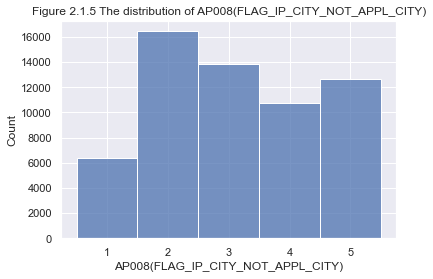

In [14]:
sns.set(style="darkgrid")

# The distribution of AP008
sns.histplot(train['AP008'], discrete=True).\
    set(title='Figure 2.1.5 The distribution of AP008(FLAG_IP_CITY_NOT_APPL_CITY)', xlabel='AP008(FLAG_IP_CITY_NOT_APPL_CITY)')

[Text(0.5, 1.0, 'Figure 2.1.6 The stacked distribution of loan_default by AP008(FLAG_IP_CITY_NOT_APPL_CITY)'),
 Text(0.5, 0, 'AP008(FLAG_IP_CITY_NOT_APPL_CITY)')]

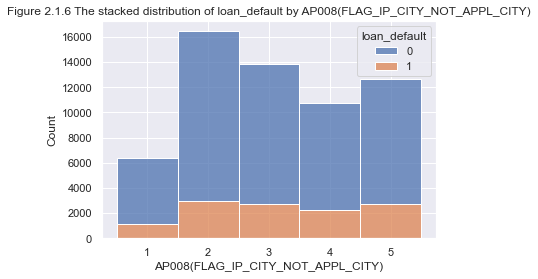

In [15]:
# The distribution of AP008 and loan_default
sns.histplot(data=train, x='AP008', hue='loan_default', multiple='stack', discrete=True).\
    set(title='Figure 2.1.6 The stacked distribution of loan_default by AP008(FLAG_IP_CITY_NOT_APPL_CITY)', xlabel='AP008(FLAG_IP_CITY_NOT_APPL_CITY)')

Insights:  
1. Figure 2.1.5 shows that the city where credit cards were flagged most is city 2, fpllowed by city 3, 5, 4. City 3 got the least flagged credit cards.
2. Figure 2.1.6, the distributions of flagged credit cards among the 5 cities are similar for apllicants with and without loan default. 

#### [Back to the top](#0)

### 2.2 Credit Bureau Variables<a class="anchor" id="22"></a>
#### 2.2.1 CR009 AMT_LOAN_TOTAL
CR009 represents the total amount of the loan and it's numeric variable.

In [16]:
train.CR009.describe()

count    6.000000e+04
mean     3.517033e+04
std      6.367449e+04
min      0.000000e+00
25%      4.700000e+03
50%      1.726600e+04
75%      4.070000e+04
max      1.420300e+06
Name: CR009, dtype: float64

[Text(0.5, 1.0, 'Figure 2.2.1 The distribution of CR009(AMT_LOAN_TOTAL)'),
 Text(0.5, 0, 'CR009(AMT_LOAN_TOTAL)')]

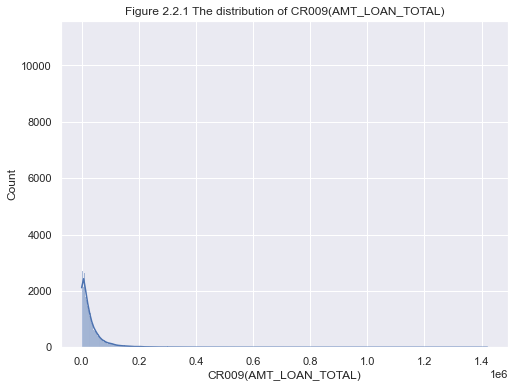

In [17]:
sns.set(style="darkgrid")
plt.figure(figsize=(8,6))

# The distribution of CR009
sns.histplot(data=train, x='CR009', kde=True).\
    set(title='Figure 2.2.1 The distribution of CR009(AMT_LOAN_TOTAL)', xlabel='CR009(AMT_LOAN_TOTAL)')

[Text(0.5, 1.0, 'Figure 2.2.2 The stacked distribution of loan_default by CR009(AMT_LOAN_TOTAL)'),
 Text(0.5, 0, 'CR009(AMT_LOAN_TOTAL)')]

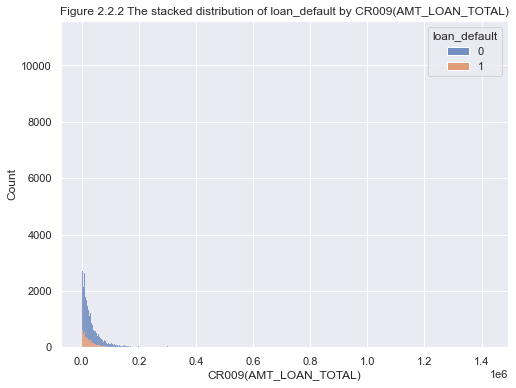

In [18]:
plt.figure(figsize=(8,6))
# The distribution of CR009 and loan_default
sns.histplot(data=train, x='CR009', hue='loan_default', multiple='stack').\
    set(title='Figure 2.2.2 The stacked distribution of loan_default by CR009(AMT_LOAN_TOTAL)', xlabel='CR009(AMT_LOAN_TOTAL)')

Insights:  
1. Figure 2.2.1 shows that the distribution of the total amount of the loan is skewed to the right. The total amount of the loan ranges from 0 to 1420300, with a mean of 35170.33225.
2. Figure 2.2.2 shows that the distributions of the total amount of the loan are similar for apllicants with and without loan default. 

#### [Back to the top](#0)

#### 2.2.2 CR015 MONTH_CREDIT_CARD_MOB_MAX
CR015 represents max MOB in a month. According to the data, it is a categorical variable with 5 levels.
*not sure about the meaning of MOB, maybe it stands for "Mobile and On-line Banking".

In [19]:
train.CR015.value_counts()

5    25701
6    20336
3     5928
4     5492
2     2543
Name: CR015, dtype: int64

[Text(0.5, 1.0, 'Figure 2.2.3 The distribution of CR015(MONTH_CREDIT_CARD_MOB_MAX)'),
 Text(0.5, 0, 'CR015(MONTH_CREDIT_CARD_MOB_MAX)')]

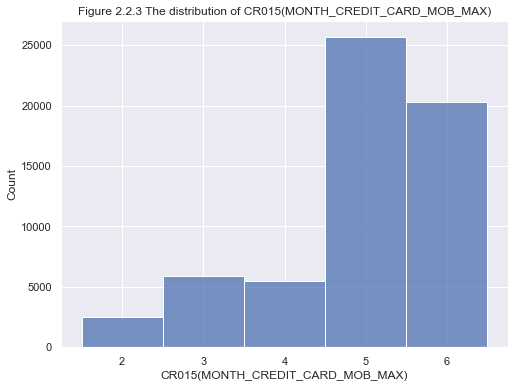

In [20]:
sns.set(style="darkgrid")
plt.figure(figsize=(8,6))

# The distribution of CR015
sns.histplot(data=train, x='CR015', discrete=True).\
    set(title='Figure 2.2.3 The distribution of CR015(MONTH_CREDIT_CARD_MOB_MAX)', xlabel='CR015(MONTH_CREDIT_CARD_MOB_MAX)')

[Text(0.5, 1.0, 'Figure 2.2.4 The stacked distribution of loan_default by CR015(MONTH_CREDIT_CARD_MOB_MAX)'),
 Text(0.5, 0, 'CR015(MONTH_CREDIT_CARD_MOB_MAX)')]

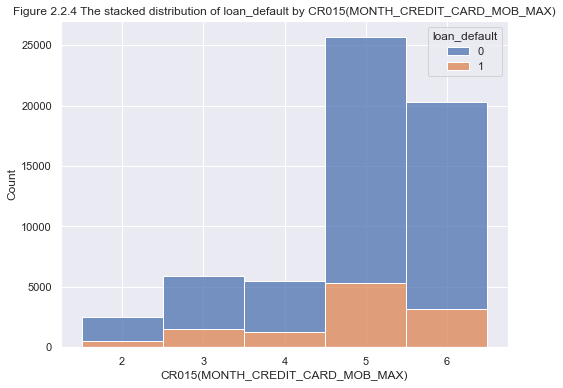

In [21]:
plt.figure(figsize=(8,6))
# The distribution of CR015 and loan_default
sns.histplot(data=train, x='CR015', hue='loan_default', multiple='stack', discrete=True).\
    set(title='Figure 2.2.4 The stacked distribution of loan_default by CR015(MONTH_CREDIT_CARD_MOB_MAX)', xlabel='CR015(MONTH_CREDIT_CARD_MOB_MAX)')

Insights:  
1. Figure 2.2.3 shows that most of MONTH_CREDIT_CARD_MOB_MAX is in level 5 and followed by level 6.
2. Figure 2.2.4 shows that the distributions of MONTH_CREDIT_CARD_MOB_MAX  are similar for apllicants with and without loan default. 

#### [Back to the top](#0)

#### 2.2.3 CR019 SCORE_SINGLE_DEBIT_CARD_LIMIT
CR019 represents the score of single transaction limitation for debit card. According to the data, it is a categorical variable with 12 levels.

In [22]:
train.CR019.value_counts()

11    10016
3     10006
4      7359
5      7125
2      6310
7      4856
6      3884
12     3256
8      2432
9      2191
10     1726
1       839
Name: CR019, dtype: int64

[Text(0.5, 1.0, 'Figure 2.2.5 The distribution of CR019(SCORE_SINGLE_DEBIT_CARD_LIMIT)'),
 Text(0.5, 0, 'CR019(SCORE_SINGLE_DEBIT_CARD_LIMIT)')]

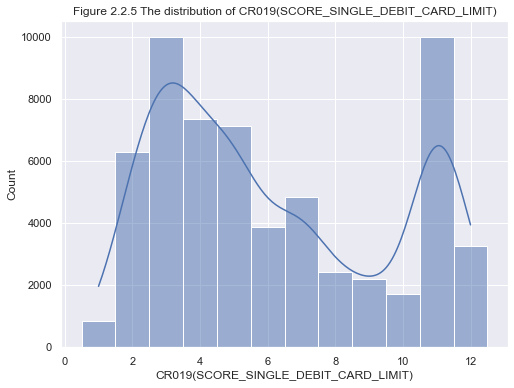

In [23]:
sns.set(style="darkgrid")
plt.figure(figsize=(8,6))

# The distribution of CR019
sns.histplot(data=train, x='CR019', discrete=True, kde=True, kde_kws={'bw_adjust':2}).\
    set(title='Figure 2.2.5 The distribution of CR019(SCORE_SINGLE_DEBIT_CARD_LIMIT)', xlabel='CR019(SCORE_SINGLE_DEBIT_CARD_LIMIT)')

[Text(0.5, 1.0, 'Figure 2.2.6 The stacked distribution of loan_default by CR019(SCORE_SINGLE_DEBIT_CARD_LIMIT)'),
 Text(0.5, 0, 'CR019(SCORE_SINGLE_DEBIT_CARD_LIMIT)')]

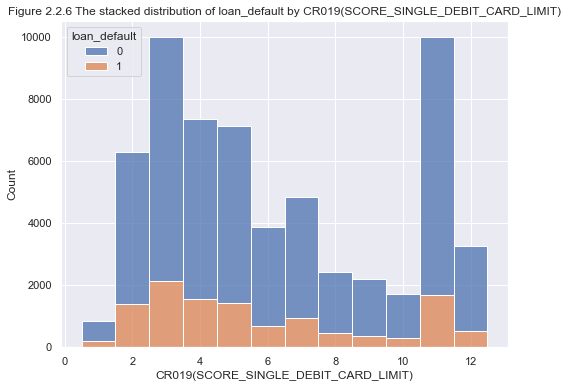

In [24]:
plt.figure(figsize=(8,6))
# The distribution of CR019 and loan_default
sns.histplot(data=train, x='CR019', hue='loan_default', multiple='stack', discrete=True).\
    set(title='Figure 2.2.6 The stacked distribution of loan_default by CR019(SCORE_SINGLE_DEBIT_CARD_LIMIT)', xlabel='CR019(SCORE_SINGLE_DEBIT_CARD_LIMIT)')

Insights:  
1. Figure 2.2.5 shows that the scores of single transaction limitation for debit card for most of the records are 3 and 11.
2. Figure 2.2.6 shows that the distributions of scores of single transaction limitation for debit card are similar for apllicants with and without loan default. 

#### [Back to the top](#0)

### 2.3 Call Detail Variables <a class="anchor" id="23"></a>
The variables for call detail are PA022, PA023, PA029.  
 - PA022(DAYS_BTW_APPLICATION_AND_FIRST_COLLECTION_OR_HIGH_RISK_CALL): the days between application and first collection or high risk call;  
 - PA023(DAYS_BTW_APPLICATION_AND_FIRST_COLLECTION_CALL): the days between the application and the first collection call;  
 - PA029(AVG_LEN_COLLECTION_OR_HIGH_RISK_INBOUND_CALLS): the average length of collection or high risk inbound calls.  
 
All three above are numeric variables.

In [25]:
train[['PA022', 'PA023', 'PA029']].describe()

,PA022,PA023,PA029
count,59721.000000,59721.000000,59721.000000
mean,19.363072,14.943655,-42.333639
std,39.747875,37.075574,97.807084
min,-99.000000,-99.000000,-99.000000
25%,-1.000000,-1.000000,-98.000000
50%,-1.000000,-1.000000,-98.000000
75%,41.000000,15.000000,26.000000
max,448.000000,448.000000,2872.000000


We can use a for loop to plot the distributions of these 3 variables to make it more manageable.  

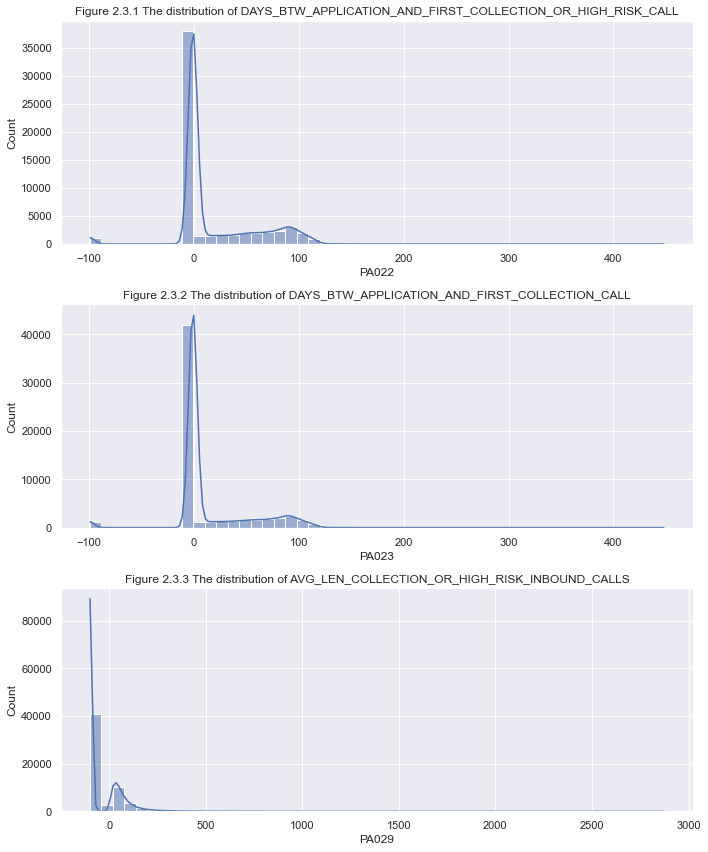

In [26]:
# The distribution of 3 Call Detail variables
plt.figure(figsize=(10,12))

# Create variable lists
var_PA = ['PA022', 'PA023', 'PA029']
des_PA = ['DAYS_BTW_APPLICATION_AND_FIRST_COLLECTION_OR_HIGH_RISK_CALL',\
          'DAYS_BTW_APPLICATION_AND_FIRST_COLLECTION_CALL','AVG_LEN_COLLECTION_OR_HIGH_RISK_INBOUND_CALLS']

# Plot the 3 distributions with for loop
a = 1
for (v,d) in zip(var_PA,des_PA):
    ax = plt.subplot(3, 1, a)
    sns.histplot(train[v], ax=ax, bins=50, kde=True).\
        set(title='Figure 2.3.'+ str(a) + ' The distribution of ' + d ,\
            xlabel=v)
    a += 1

plt.tight_layout()

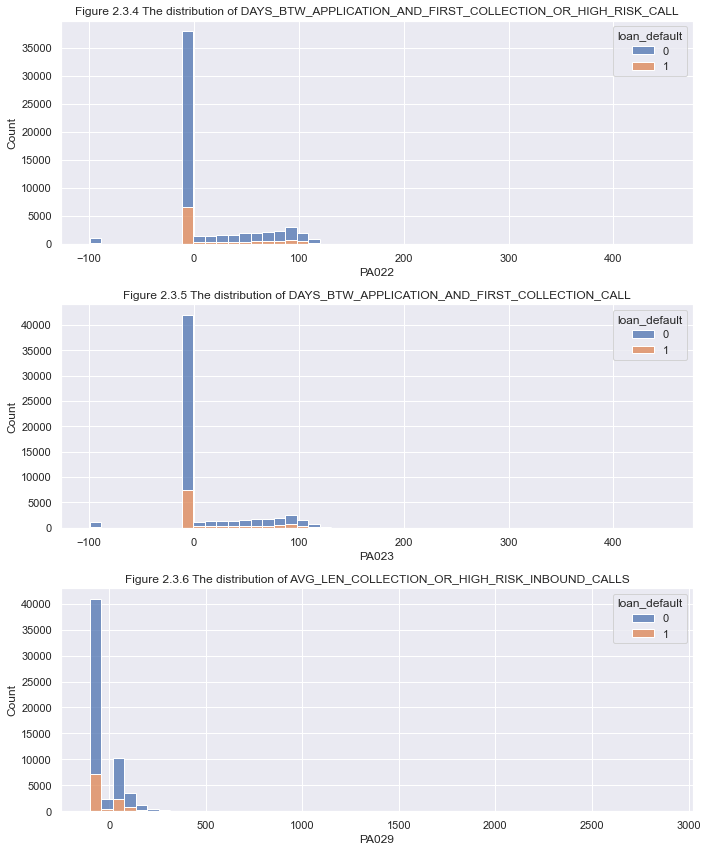

In [27]:
plt.figure(figsize=(10,12))

# The distributions of the three call detail varianles and loan_default

a = 1
for (v,d) in zip(var_PA,des_PA):
    ax = plt.subplot(3, 1, a)
    sns.histplot(data=train, x=v, hue='loan_default', multiple='stack', ax=ax, bins=50).\
        set(title='Figure 2.3.'+ str(a+3) + ' The distribution of ' + d ,\
            xlabel=v)
    a += 1

plt.tight_layout()

To better see the relationship between loan default and the three cariables, we can plot the density of the loan default by each of the call detail variables.

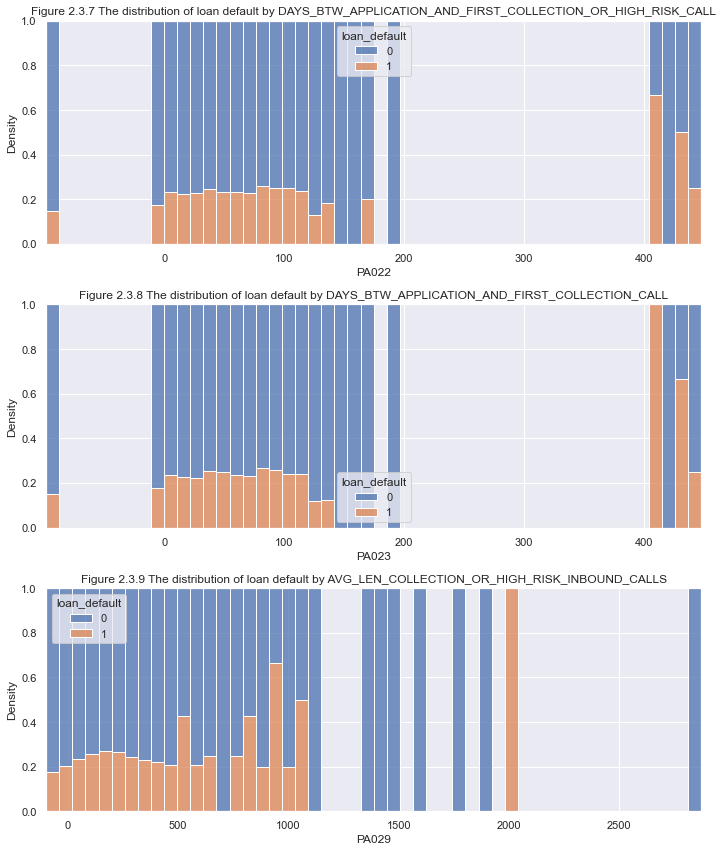

In [28]:
plt.figure(figsize=(10,12))

# The density distributions of loan default by the three call detail varianles
a = 1
for (v,d) in zip(var_PA,des_PA):
    ax = plt.subplot(3, 1, a)
    sns.histplot(data=train, x=v, hue='loan_default', stat = 'density', multiple='fill', ax=ax, bins=50).\
        set(title='Figure 2.3.'+ str(a+6) + ' The distribution of loan default by ' + d,\
            xlabel=v)
    a += 1

plt.tight_layout()

Insight:
1. PA022(DAYS_BTW_APPLICATION_AND_FIRST_COLLECTION_OR_HIGH_RISK_CALL):   
    - Figure 2.3.1 shows that the days between application and first collection or high risk call ranges from -99 to 448, with a mean of 19.36 and the median is -1. Most of the intervals were -1.  
    - Figure 2.3.7 shows that the probability to be loan default were around 20% when the interval is under 200 days. When the interval is higher than 400 days, the probability to be loan default goes extrme higher.
2. PA023(DAYS_BTW_APPLICATION_AND_FIRST_COLLECTION_CALL):   
    - Figure 2.3.2 shows that the days between the application and the first collection call range from -99 to 448, with a mean of 14.94 and the median is -1. Most of the intervals were -1.
    - Figure 2.3.8 shows that the probability to be loan default were around 20% when the interval is under 130 days. When the interval is higher than 400 days, the probability to be loan default goes extrme higher.
3. PA029(AVG_LEN_COLLECTION_OR_HIGH_RISK_INBOUND_CALLS):  
    - Figure 2.3.3 shows thatthe average length of collection or high risk inbound calls ranges from -99 to 2872, with a mean at -42.33 and the median is -98. Most of the intervals were -98.
    - Figure 2.3.9 shows that the probability to be loan default increase as the average length goes higher when the length is under 1100 days. The probability to be loan default goes extrme high when the average length is around 2000 days.

#### [Back to the top](#0)

### 2.4 Credit Center Variables <a class="anchor" id="24"></a>
There are 6 credit center variables: TD001, TD005, TD006, TD009, TD010, TD014.
 - TD001(TD_CNT_QUERY_LAST_7Day_P2P): the amount of track-data query for P2P in last 7 days,
 - TD005(TD_CNT_QUERY_LAST_1MON_P2P): the amount of track-data query for P2P in last 1 month,
 - TD006(TD_CNT_QUERY_LAST_1MON_SMALL_LOAN): the amount of track-data query for small loan in last 1 month,
 - TD009(TD_CNT_QUERY_LAST_3MON_P2P): the amount of track-data query for P2P in last 3 months,
 - TD010(TD_CNT_QUERY_LAST_3MON_SMALL_LOAN): the amount of track-data query for small loan in last 3 months,
 - TD014(TD_CNT_QUERY_LAST_6MON_SMALL_LOAN): the amount of track-data query for small loan in last 6 months.   

*Not sure if "TD" stands for "track data".

In [29]:
train[['TD001', 'TD005', 'TD006', 'TD009', 'TD010', 'TD014']].describe()

,TD001,TD005,TD006,TD009,TD010,TD014
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,1.992450,3.599217,1.347567,5.414867,2.023183,2.607933
std,1.811541,2.801824,1.411547,4.012824,1.965505,2.500704
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,3.000000,1.000000,1.000000
50%,2.000000,3.000000,1.000000,4.000000,2.000000,2.000000
75%,3.000000,5.000000,2.000000,7.000000,3.000000,4.000000
max,20.000000,24.000000,21.000000,46.000000,35.000000,43.000000


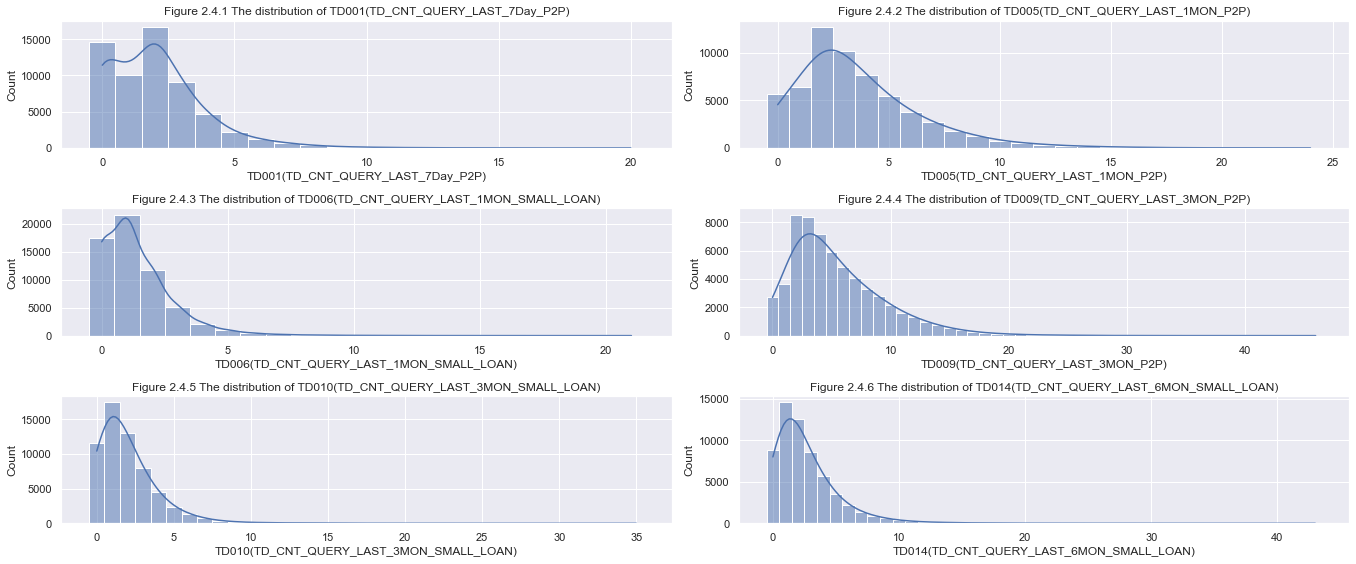

In [30]:
# The distribution of 6 Credit Center variables
plt.figure(figsize=(19,8))

# Create variable lists
var_TD = ['TD001', 'TD005', 'TD006', 'TD009', 'TD010', 'TD014']
des_TD = ['TD_CNT_QUERY_LAST_7Day_P2P','TD_CNT_QUERY_LAST_1MON_P2P','TD_CNT_QUERY_LAST_1MON_SMALL_LOAN',\
          'TD_CNT_QUERY_LAST_3MON_P2P','TD_CNT_QUERY_LAST_3MON_SMALL_LOAN','TD_CNT_QUERY_LAST_6MON_SMALL_LOAN']

# Plot 6 distributions with for loop
a = 1
for (v,d) in zip(var_TD,des_TD):
    ax = plt.subplot(3, 2, a)
    sns.histplot(train[v], ax=ax, discrete=True, kde=True, kde_kws={'bw_adjust':3}).\
        set(title='Figure 2.4.'+ str(a) + ' The distribution of ' + v +'('+ d +')',\
            xlabel=v +'('+ d +')')
    a += 1

plt.tight_layout()

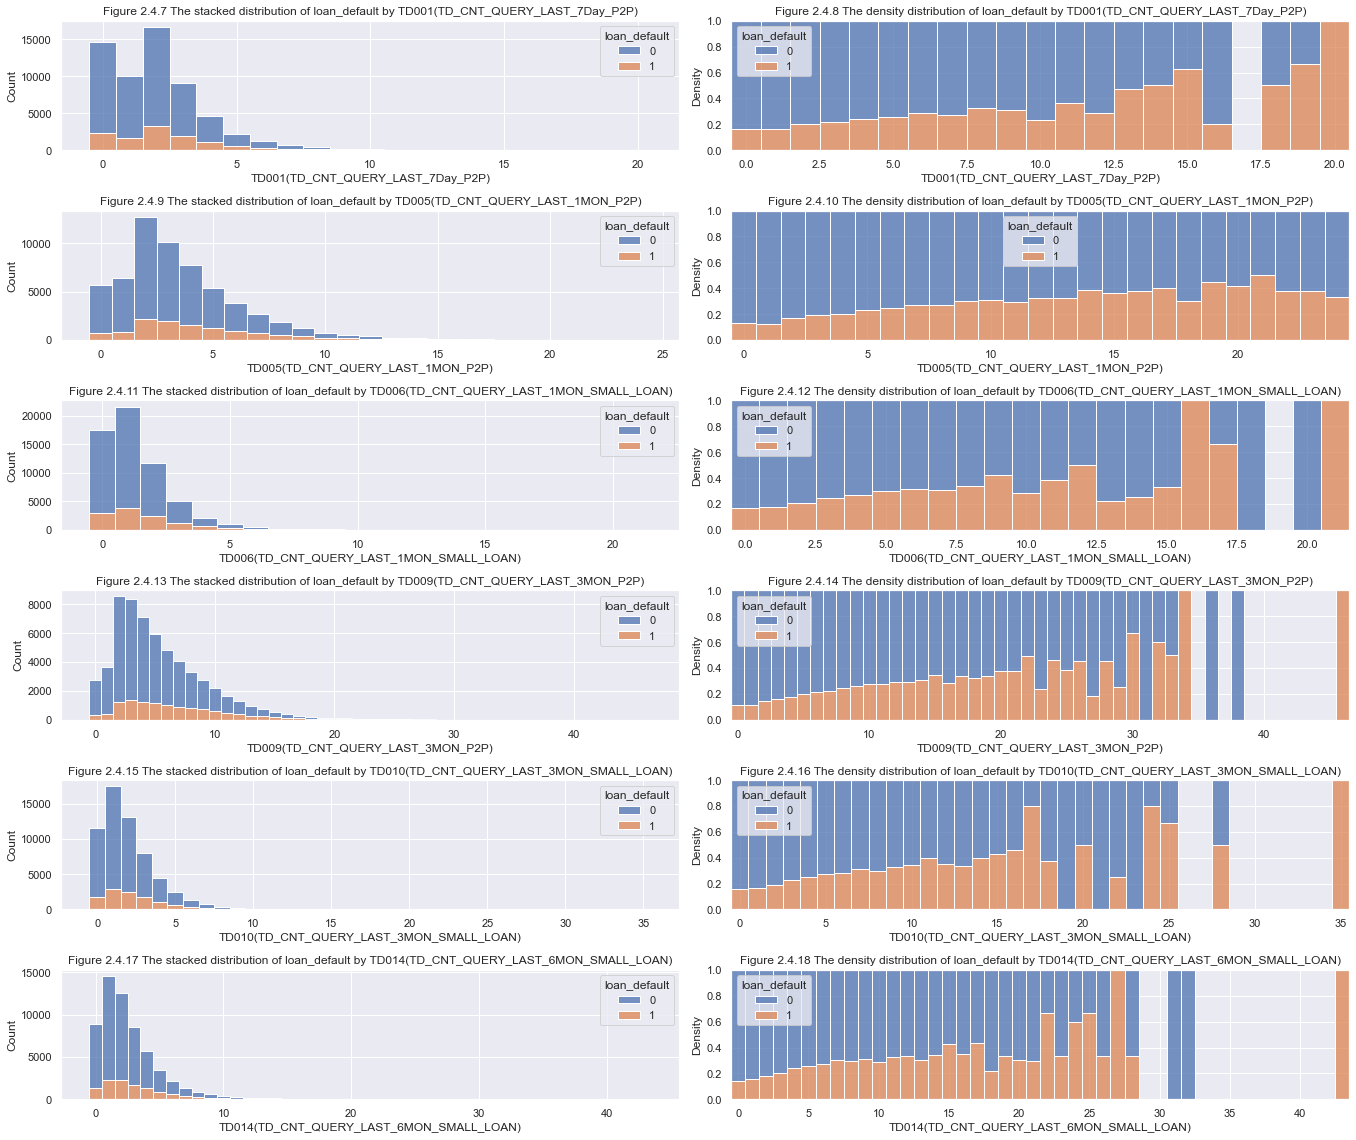

In [31]:
# The distribution of loan_default by 6 Credit Center variables
plt.figure(figsize=(19,16))

# Plot distributions with for loop
a = 1
for (v,d) in zip(var_TD,des_TD):
    ax1 = plt.subplot(6, 2, a)
    
    ## plot the stacked distribution
    sns.histplot(data=train, x=v, hue='loan_default', multiple='stack', discrete=True, ax=ax1).\
        set(title='Figure 2.4.'+ str(a+6) + ' The stacked distribution of loan_default by ' + v +'('+ d +')',\
            xlabel=v +'('+ d +')')
    
    a += 1
    ax2 = plt.subplot(6, 2, a)
    
    ## plot the density distribution
    sns.histplot(data=train, x=v, hue='loan_default', multiple='fill', stat = 'density', discrete=True, ax=ax2).\
        set(title='Figure 2.4.'+ str(a+6) + ' The density distribution of loan_default by ' + v +'('+ d +')', xlabel=v +'('+ d +')')
    a += 1

plt.tight_layout()


Insights:

1. TD001(TD_CNT_QUERY_LAST_7Day_P2P):  
    - Figure 2.4.1 shows that the amount of track-data query for P2P in last 7 days range from 0 to 20, with a median of 2. The distribution is skewed to the right and most of them lies between 0 and 4.
    - Figure 2.4.8 shows that the probability to be loan fault goes higher as the amount of TD query for P2P in the last 7 days goes higher.
2. TD005(TD_CNT_QUERY_LAST_1MON_P2P): 
    - Figure 2.4.2 shows that the amount of track-data query for P2P in last 1 month range from 0 to 24, with a median of 3. The distribution is skewed to the right and most of them lies between 0 and 7.
    - Figure 2.4.10 shows that the probability to be loan fault goes higher as the amount of TD query for P2P in the last 1 month goes higher. It reach a relatively steady stage when the amount is more than 14, with a probability of loan default of 40%.
3. TD006(TD_CNT_QUERY_LAST_1MON_SMALL_LOAN):  
    - Figure 2.4.3 shows that the amount of track-data query for small loan in last 1 month range from 0 to 21, with a median of 1. The distribution is skewed to the right and most of them lies between 0 and 4.
    - Figure 2.4.12 shows that the probability to be loan fault goes higher as the amount of TD query for small loan in last 1 month goes higher in general.
4. TD009(TD_CNT_QUERY_LAST_3MON_P2P):  
    - Figure 2.4.4 shows that the amount of track-data query for P2P in last 3 months range from 0 to 46, with a median of 4. The distribution is skewed to the right and most of them lies between 0 and 12.
    - Figure 2.4.14 shows that the probability to be loan fault goes higher as the amount of TD query for P2P in last 3 months goes higher in general.
5. TD010(TD_CNT_QUERY_LAST_3MON_SMALL_LOAN):  
    - Figure 2.4.5 shows that the amount of track-data query for small loan in last 3 months range from 0 to 35, with a median of 2. The distribution is skewed to the right and most of them lies between 0 and 5.
    - Figure 2.4.16 shows that the probability to be loan fault goes higher as the amount of TD query for small loan in last 3 months goes higher in general.
6. TD014(TD_CNT_QUERY_LAST_6MON_SMALL_LOAN):     
    - Figure 2.4.6 shows that the amount of track-data query for small loan in last 6 months range from 0 to 43, with a median of 2. The distribution is skewed to the right and most of them lies between 0 and 8.
    - Figure 2.4.18 shows that the probability to be loan fault goes higher as the amount of TD query for small loan in last 6 months goes higher in general.

#### [Back to the top](#0) 

## 3. Featrue Engineering <a class="anchor" id="3"></a>
### 3.1 Binning the numerical variables<a class="anchor" id="31"></a>
We will bin the three call detail variables to categorical variables for later analysis.
In the EDA before, we find out that the three call detail variables have some values with extreme higher propotion than the rest. Therefore, it will be more reasonable to bin those values into one seperate category.
#### 3.1.1 PA022(DAYS_BTW_APPLICATION_AND_FIRST_COLLECTION_OR_HIGH_RISK_CALL)
According to the EDA, the values for PA022 lies on "-1" much more than others.

In [33]:
# Split the data with 10 percentile and add an additional 'NoData' category for "NA".
train['PA022_D'] = pd.qcut(train['PA022'],10,duplicates='drop').values.add_categories('NoData')
train['PA022_D'] = train['PA022_D'].fillna('NoData').astype('str')

# Find the values of '-1' and assign them to the '-1' category
train.loc[train['PA022']==-1, 'PA022_D'] = '-1'

train.PA022_D.value_counts()

-1                 37962
(58.0, 87.0]        6086
(20.0, 58.0]        5927
(87.0, 448.0]       5846
(-1.0, 20.0]        2769
(-99.001, -1.0]     1131
NoData               279
Name: PA022_D, dtype: int64

Text(0.5, 1.0, 'Figure 3.1.1 The Distribution of PA022_D')

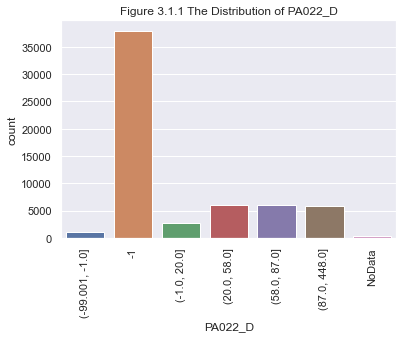

In [34]:
# Plot the distribution of PA022_D
plt.figure(figsize=(6,4))
g = sns.countplot(x='PA022_D', data=train, \
                  order=['(-99.001, -1.0]','-1','(-1.0, 20.0]','(20.0, 58.0]','(58.0, 87.0]','(87.0, 448.0]','NoData'])
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Figure 3.1.1 The Distribution of PA022_D')

#### 3.1.2 PA023(DAYS_BTW_APPLICATION_AND_FIRST_COLLECTION_CALL)
According to the EDA, the values for PA023 lies on "-1" much more than others.

In [35]:
# Split the data with 10 percentile and add an additional 'NoData' category for "NA".
train['PA023_D'] = pd.qcut(train['PA023'],10,duplicates='drop').values.add_categories('NoData')
train['PA023_D'] = train['PA023_D'].fillna('NoData').astype('str')

# Find the values of '-1' and assign them to the '-1' category
train.loc[train['PA023']==-1, 'PA023_D'] = '-1'

train.PA023_D.value_counts()

-1                 41917
(41.0, 81.0]        6051
(81.0, 448.0]       5846
(-1.0, 41.0]        4776
(-99.001, -1.0]     1131
NoData               279
Name: PA023_D, dtype: int64

Text(0.5, 1.0, 'Figure 3.1.2 The Distribution of PA023_D')

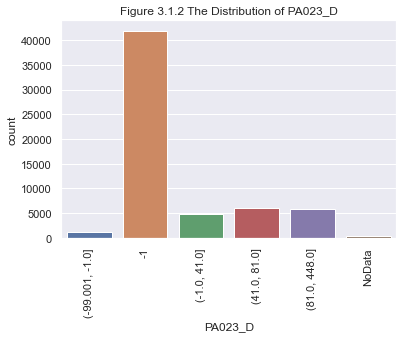

In [36]:
# Plot the distribution of PA023_D
plt.figure(figsize=(6,4))
g = sns.countplot(x='PA023_D', data=train, \
                  order=['(-99.001, -1.0]','-1','(-1.0, 41.0]','(41.0, 81.0]','(81.0, 448.0]','NoData'])
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Figure 3.1.2 The Distribution of PA023_D')

#### 3.1.3 PA029(AVG_LEN_COLLECTION_OR_HIGH_RISK_INBOUND_CALLS)
According to the EDA, the values for PA029 lies on "-98" much more than others.

In [37]:
# Split the data with 10 percentile and add an additional 'NoData' category for "NA".
train['PA029_D'] = pd.qcut(train['PA029'],10,duplicates='drop').values.add_categories('NoData')
train['PA029_D'] = train['PA029_D'].fillna('NoData').astype('str')

# Find the values of '-98' and assign them to the '-98' category
train.loc[train['PA029']==-98, 'PA029_D'] = '-98'

train.PA029_D.value_counts()

-98                 39821
(79.5, 2872.0]       5966
(11.0, 40.0]         5951
(40.0, 79.5]         5929
(-99.001, -98.0]     1131
(-98.0, 11.0]         923
NoData                279
Name: PA029_D, dtype: int64

Text(0.5, 1.0, 'Figure 3.1.3 The Distribution of PA029_D')

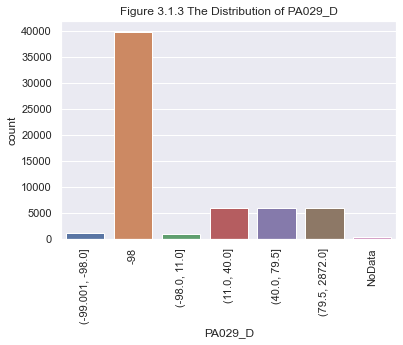

In [38]:
# Plot the distribution of PA029_D
plt.figure(figsize=(6,4))
g = sns.countplot(x='PA029_D', data=train, \
                  order=['(-99.001, -98.0]','-98','(-98.0, 11.0]','(11.0, 40.0]','(40.0, 79.5]','(79.5, 2872.0]', 'NoData'])
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Figure 3.1.3 The Distribution of PA029_D')

#### [Back to the top](#0)

### 3.2 WOE Transformation for Categorical Variables <a class="anchor" id="32"></a>
The goal of WOE(Weight of Evidence) transformation is to get the maximum difference among the binned categories relating to the target variable. It counts the number of responders and non-responders in each binned categories, then assigns a numeric value to each of the binned categories.

In [39]:
# Define a Function for WOE
def WOE(var):
    train[var] = train[var].fillna('NoData')
    k = train[[var,'loan_default']].groupby(var)['loan_default'].agg(['count','sum']).reset_index()
    k.columns = [var,'Count','Good']
    k['Bad'] = k['Count'] - k['Good']
    k['Good %'] = (k['Good'] / k['Good'].sum()*100).round(2)
    k['Bad %'] = (k['Bad'] / k['Bad'].sum()*100).round(2)
    k[var+'_WOE'] = np.log(k['Good %'] / k['Bad %']).round(2)
    k = k.sort_values(by=var+'_WOE')
    return(k)

#### 3.2.1 Applicate Variables
In the applicate variables, AP003(CODE_EDUCATION) and AP008(FLAG_IP_CITY_NOT_APPL_CITY) are categorical variables. We can do WOE transformation on them.
#### AP003

In [40]:
# WOE for AP003
k_AP003 = WOE('AP003')
k_AP003

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,AP003,Count,Good,Bad,Good %,Bad %,AP003_WOE
4,6,11,0,11,0.00,0.02,-inf
3,5,174,10,164,0.09,0.34,-1.33
2,4,8121,1070,7051,9.14,14.60,-0.47
1,3,17874,3114,14760,26.59,30.57,-0.14
0,1,33820,7519,26301,64.19,54.47,0.16


Noted that AP003 after WOE contains "-inf" value which needs futher transformation. 

In [41]:
# Replace inf with 9999
from numpy import inf
k_AP003.loc[k_AP003['AP003_WOE']==-inf, 'AP003_WOE'] = '-999'
k_AP003

,AP003,Count,Good,Bad,Good %,Bad %,AP003_WOE
4,6,11,0,11,0.00,0.02,-999
3,5,174,10,164,0.09,0.34,-1.33
2,4,8121,1070,7051,9.14,14.60,-0.47
1,3,17874,3114,14760,26.59,30.57,-0.14
0,1,33820,7519,26301,64.19,54.47,0.16


In [42]:
# Append the WOE value of each category back to the original data
train = pd.merge(train, k_AP003[['AP003','AP003_WOE']],
                 left_on='AP003',right_on='AP003', how='left')

#### AP008

In [43]:
# WOE for AP008
k_AP008 = WOE('AP008')
k_AP008

,AP008,Count,Good,Bad,Good %,Bad %,AP008_WOE
0,1,6375,1097,5278,9.37,10.93,-0.15
1,2,16442,2964,13478,25.31,27.91,-0.10
2,3,13808,2698,11110,23.03,23.01,0.00
3,4,10750,2251,8499,19.22,17.60,0.09
4,5,12625,2703,9922,23.08,20.55,0.12


In [44]:
# Append the WOE value of each category back to the original data
train = pd.merge(train, k_AP008[['AP008','AP008_WOE']],
                 left_on='AP008',right_on='AP008', how='left')

In [45]:
# the first 5 records of train dataset after WOE for applicate variables
train.head()

,loan_default,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,PA029,...,TD005,TD006,TD009,TD010,TD014,PA022_D,PA023_D,PA029_D,AP003_WOE,AP008_WOE
0,0,24,3,1,0,3,3,-1.0,-1.0,-98.0,...,2,1,2,1,1,-1,-1,-98,-0.14,-0.15
1,0,28,3,5,28200,5,4,-1.0,-1.0,-98.0,...,6,2,12,3,5,-1,-1,-98,-0.14,0.12
2,0,27,4,3,606,6,12,-1.0,-1.0,-98.0,...,3,1,5,2,3,-1,-1,-98,-0.47,0.00
3,0,31,1,2,18000,5,12,-1.0,-1.0,-98.0,...,6,1,8,1,1,-1,-1,-98,0.16,-0.10
4,0,44,1,5,1500,4,3,-1.0,-1.0,-98.0,...,4,1,5,1,1,-1,-1,-98,0.16,0.12


#### 3.2.2 Credit Bureau Variables
In credit bureau variables, CR015(MONTH_CREDIT_CARD_MOB_MAX) and CR019(SCORE_SINGLE_DEBIT_CARD_LIMIT) are categorical variables. We can do WOE transformation on them.
#### CR015

In [46]:
# Apply the WOE to CR015
k_CR015 = WOE('CR015')
k_CR015

,CR015,Count,Good,Bad,Good %,Bad %,CR015_WOE
4,6,20336,3162,17174,27.00,35.57,-0.28
0,2,2543,481,2062,4.11,4.27,-0.04
3,5,25701,5345,20356,45.63,42.16,0.08
2,4,5492,1241,4251,10.60,8.80,0.19
1,3,5928,1484,4444,12.67,9.20,0.32


In [47]:
# Append the WOE value of each category back to the original data
train = pd.merge(train, k_CR015[['CR015','CR015_WOE']],
                 left_on='CR015',right_on='CR015', how='left')

#### CR019

In [48]:
# WOE for CR019
k_CR019 = WOE('CR019')
k_CR019

,CR019,Count,Good,Bad,Good %,Bad %,CR019_WOE
11,12,3256,527,2729,4.50,5.65,-0.23
8,9,2191,359,1832,3.06,3.79,-0.21
10,11,10016,1675,8341,14.30,17.27,-0.19
5,6,3884,684,3200,5.84,6.63,-0.13
9,10,1726,307,1419,2.62,2.94,-0.12
7,8,2432,463,1969,3.95,4.08,-0.03
6,7,4856,956,3900,8.16,8.08,0.01
4,5,7125,1436,5689,12.26,11.78,0.04
3,4,7359,1556,5803,13.28,12.02,0.10
2,3,10006,2152,7854,18.37,16.27,0.12


In [49]:
# Append the WOE value of each category back to the original data
train = pd.merge(train, k_CR019[['CR019','CR019_WOE']],
                 left_on='CR019',right_on='CR019', how='left')

In [50]:
# the first 5 records of train dataset after WOE for applicate variables
train.head()

,loan_default,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,PA029,...,TD009,TD010,TD014,PA022_D,PA023_D,PA029_D,AP003_WOE,AP008_WOE,CR015_WOE,CR019_WOE
0,0,24,3,1,0,3,3,-1.0,-1.0,-98.0,...,2,1,1,-1,-1,-98,-0.14,-0.15,0.32,0.12
1,0,28,3,5,28200,5,4,-1.0,-1.0,-98.0,...,12,3,5,-1,-1,-98,-0.14,0.12,0.08,0.10
2,0,27,4,3,606,6,12,-1.0,-1.0,-98.0,...,5,2,3,-1,-1,-98,-0.47,0.00,-0.28,-0.23
3,0,31,1,2,18000,5,12,-1.0,-1.0,-98.0,...,8,1,1,-1,-1,-98,0.16,-0.10,0.08,-0.23
4,0,44,1,5,1500,4,3,-1.0,-1.0,-98.0,...,5,1,1,-1,-1,-98,0.16,0.12,0.19,0.12


#### 3.2.3 Binned Call Detail Variables: PA022_D, PA023_D, and PA029_D
The Credit Bureau variables were binned into categorical variables before. Now, we can do WOE transformation to PA022_D, PA023_D, and PA029_D.
#### PA022_D

In [51]:
# Apply the WOE to PA022_D
k_PA022_D = WOE('PA022_D')
k_PA022_D

,PA022_D,Count,Good,Bad,Good %,Bad %,PA022_D_WOE
1,"(-99.001, -1.0]",1131,168,963,1.43,1.99,-0.33
5,-1,37962,6558,31404,55.99,65.04,-0.15
0,"(-1.0, 20.0]",2769,630,2139,5.38,4.43,0.19
6,NoData,279,64,215,0.55,0.45,0.20
2,"(20.0, 58.0]",5927,1380,4547,11.78,9.42,0.22
3,"(58.0, 87.0]",6086,1468,4618,12.53,9.56,0.27
4,"(87.0, 448.0]",5846,1445,4401,12.34,9.11,0.30


In [52]:
# Append the WOE value of each category back to the original data
train = pd.merge(train, k_PA022_D[['PA022_D','PA022_D_WOE']],
                 left_on='PA022_D',right_on='PA022_D', how='left')

#### PA023_D

In [53]:
# WOE for PA023_D
k_PA023_D = WOE('PA023_D')
k_PA023_D

,PA023_D,Count,Good,Bad,Good %,Bad %,PA023_D_WOE
1,"(-99.001, -1.0]",1131,168,963,1.43,1.99,-0.33
4,-1,41917,7414,34503,63.30,71.45,-0.12
5,NoData,279,64,215,0.55,0.45,0.20
0,"(-1.0, 41.0]",4776,1129,3647,9.64,7.55,0.24
2,"(41.0, 81.0]",6051,1470,4581,12.55,9.49,0.28
3,"(81.0, 448.0]",5846,1468,4378,12.53,9.07,0.32


In [54]:
# Append the WOE value of each category back to the original data
train = pd.merge(train, k_PA023_D[['PA023_D','PA023_D_WOE']],
                 left_on='PA023_D',right_on='PA023_D', how='left')

#### PA029_D

In [55]:
# WOE for PA029_D
k_PA029_D = WOE('PA029_D')
k_PA029_D

,PA029_D,Count,Good,Bad,Good %,Bad %,PA029_D_WOE
1,"(-99.001, -98.0]",1131,168,963,1.43,1.99,-0.33
5,-98,39821,6991,32830,59.69,67.99,-0.13
0,"(-98.0, 11.0]",923,193,730,1.65,1.51,0.09
2,"(11.0, 40.0]",5951,1248,4703,10.65,9.74,0.09
6,NoData,279,64,215,0.55,0.45,0.20
3,"(40.0, 79.5]",5929,1502,4427,12.82,9.17,0.34
4,"(79.5, 2872.0]",5966,1547,4419,13.21,9.15,0.37


In [56]:
# Append the WOE value of each category back to the original data
train = pd.merge(train, k_PA029_D[['PA029_D','PA029_D_WOE']],
                 left_on='PA029_D',right_on='PA029_D', how='left')

In [57]:
# the first 5 records of train dataset after WOE for applicate variables
train.head()

,loan_default,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,PA029,...,PA022_D,PA023_D,PA029_D,AP003_WOE,AP008_WOE,CR015_WOE,CR019_WOE,PA022_D_WOE,PA023_D_WOE,PA029_D_WOE
0,0,24,3,1,0,3,3,-1.0,-1.0,-98.0,...,-1,-1,-98,-0.14,-0.15,0.32,0.12,-0.15,-0.12,-0.13
1,0,28,3,5,28200,5,4,-1.0,-1.0,-98.0,...,-1,-1,-98,-0.14,0.12,0.08,0.10,-0.15,-0.12,-0.13
2,0,27,4,3,606,6,12,-1.0,-1.0,-98.0,...,-1,-1,-98,-0.47,0.00,-0.28,-0.23,-0.15,-0.12,-0.13
3,0,31,1,2,18000,5,12,-1.0,-1.0,-98.0,...,-1,-1,-98,0.16,-0.10,0.08,-0.23,-0.15,-0.12,-0.13
4,0,44,1,5,1500,4,3,-1.0,-1.0,-98.0,...,-1,-1,-98,0.16,0.12,0.19,0.12,-0.15,-0.12,-0.13


#### [Back to the top](#0)

### 3.3 FE for Test Set <a class="anchor" id="33"></a>
#### 3.3.1 Bin the Call Detail Variables in Test set
To remain consistance with the train set, we need to cut the test set with the same bins.

In [58]:
# Define the function for PA022
# The bins are ['(-99.001, -1.0]','-1','(-1.0, 20.0]','(20.0, 58.0]','(58.0, 87.0]','(87.0, 448.0]','NoData']
def myfn_PA022(s):
    if s>-99.001 and s<=-1:
        return '(-99.001, -1.0]'
    elif s == -1: 
        return '-1'
    elif s>-1 and s<=20:
        return '(-1.0, 20.0]'
    elif s>20 and s<=58:
        return '(20.0, 58.0]'
    elif s>58 and s<=87:
        return '(58.0, 87.0]'
    elif s>87:
        return '(87.0, 448.0]'
    else:
        return 'NoData'
    
test['PA022_D'] = test['PA022'].apply(myfn_PA022)

# Check the categories of PA022_D
test.PA022_D.value_counts()

(-99.001, -1.0]    13080
(58.0, 87.0]        2063
(87.0, 448.0]       1954
(20.0, 58.0]        1898
(-1.0, 20.0]         903
NoData               102
Name: PA022_D, dtype: int64

In [59]:
# Define the function for PA023
# The bins are ['(-99.001, -1.0]','-1','(-1.0, 41.0]','(41.0, 81.0]','(81.0, 448.0]','NoData']

def myfn_PA023(s):
    if s>-99.001 and s<=-1:
        return '(-99.001, -1.0]'
    elif s == -1: 
        return '-1'
    elif s>-1 and s<=41:
        return '(-1.0, 41.0]'
    elif s>41 and s<=81:
        return '(41.0, 81.0]'
    elif s>81:
        return '(81.0, 448.0]'
    else:
        return 'NoData'
    
test['PA023_D'] = test['PA023'].apply(myfn_PA023)

# Check the categories of PA023_D
test.PA023_D.value_counts()

(-99.001, -1.0]    14490
(41.0, 81.0]        1972
(81.0, 448.0]       1947
(-1.0, 41.0]        1489
NoData               102
Name: PA023_D, dtype: int64

In [60]:
# Define the function for PA029
# The bins are ['(-99.001, -98.0]','-98','(-98.0, 11.0]','(11.0, 40.0]','(40.0, 79.5]','(79.5, 2872.0]', 'NoData']
def myfn_PA029(s):
    if s>-99.001 and s<=-98:
        return '(-99.001, -98.0]'
    elif s == -98: 
        return '-98'
    elif s>-98 and s<=11:
        return '(-98.0, 11.0]'
    elif s>11 and s<=40:
        return '(11.0, 40.0]'
    elif s>40 and s<=79.5:
        return '(40.0, 79.5]'
    elif s>79.5:
        return '(79.5, 2872.0]'
    else:
        return 'NoData'
    
test['PA029_D'] = test['PA029'].apply(myfn_PA029)

# Check the categories of PA029_D
test.PA029_D.value_counts()

(-99.001, -98.0]    13668
(79.5, 2872.0]       2021
(40.0, 79.5]         1948
(11.0, 40.0]         1945
(-98.0, 11.0]         316
NoData                102
Name: PA029_D, dtype: int64

#### 3.3.2 WOE for Test Set
Append the WOE value of each category back to test dataset

In [61]:
test = pd.merge(test, k_AP003[['AP003','AP003_WOE']],
                left_on='AP003',right_on='AP003', how='left')

test = pd.merge(test, k_AP008[['AP008','AP008_WOE']],
                left_on='AP008',right_on='AP008', how='left')

test = pd.merge(test, k_CR015[['CR015','CR015_WOE']],
                left_on='CR015',right_on='CR015', how='left')

test = pd.merge(test, k_PA022_D[['PA022_D','PA022_D_WOE']],
                left_on='PA022_D',right_on='PA022_D', how='left')

test = pd.merge(test, k_PA023_D[['PA023_D','PA023_D_WOE']],
                left_on='PA023_D',right_on='PA023_D', how='left')

test = pd.merge(test, k_PA029_D[['PA029_D','PA029_D_WOE']],
                left_on='PA029_D',right_on='PA029_D', how='left')

# check the result
test.head()

,loan_default,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,PA029,...,TD014,PA022_D,PA023_D,PA029_D,AP003_WOE,AP008_WOE,CR015_WOE,PA022_D_WOE,PA023_D_WOE,PA029_D_WOE
0,0,28,3,2,5500,4,7,12.0,12.0,74.0,...,2,"(-1.0, 20.0]","(-1.0, 41.0]","(40.0, 79.5]",-0.14,-0.10,0.19,0.19,0.24,0.34
1,0,25,3,4,17387,4,2,-1.0,-1.0,-98.0,...,1,"(-99.001, -1.0]","(-99.001, -1.0]","(-99.001, -98.0]",-0.14,0.09,0.19,-0.33,-0.33,-0.33
2,0,39,1,3,115900,5,6,-1.0,-1.0,-98.0,...,2,"(-99.001, -1.0]","(-99.001, -1.0]","(-99.001, -98.0]",0.16,0.00,0.08,-0.33,-0.33,-0.33
3,0,28,3,5,12100,6,1,-1.0,-1.0,-98.0,...,4,"(-99.001, -1.0]","(-99.001, -1.0]","(-99.001, -98.0]",-0.14,0.12,-0.28,-0.33,-0.33,-0.33
4,1,31,1,4,51700,5,12,-1.0,-1.0,-98.0,...,4,"(-99.001, -1.0]","(-99.001, -1.0]","(-99.001, -98.0]",0.16,0.09,0.08,-0.33,-0.33,-0.33


#### [Back to the top](#0)

## 4 Building a Decision Tree Model <a class="anchor" id="4"></a>
We can build two simple decision tree models with the original variables and variables after WOE to compare the improvement using WOE.
### 4.1 Decision Tree Model before WOE<a class="anchor" id="41"></a>
#### 4.1.1 Dataset Preparation

In [62]:
# X_train set
features_beforeWOE = ['AP001','AP003','AP008',
                      'CR009','CR015','CR019',
                      'PA022_D','PA023_D','PA029_D',
                      'TD001','TD005','TD006','TD009','TD010','TD014']

X_train_beforeWOE = train[features_beforeWOE]

X_train_beforeWOE.head()

,AP001,AP003,AP008,CR009,CR015,CR019,PA022_D,PA023_D,PA029_D,TD001,TD005,TD006,TD009,TD010,TD014
0,24,3,1,0,3,3,-1,-1,-98,2,2,1,2,1,1
1,28,3,5,28200,5,4,-1,-1,-98,1,6,2,12,3,5
2,27,4,3,606,6,12,-1,-1,-98,3,3,1,5,2,3
3,31,1,2,18000,5,12,-1,-1,-98,6,6,1,8,1,1
4,44,1,5,1500,4,3,-1,-1,-98,2,4,1,5,1,1


The call detail variables are categorical variables that need to be encoded. I first used ONE-HOT encoding to transform the variables into numerical. However, the importance of the transformed variables are too small after transformed into dummies. Then, I try label encoder which works well.

In [63]:
# Get_Dummy for One-Hot 
# dummies = pd.get_dummies(X_train_beforeWOE[['PA022_D','PA023_D','PA029_D']],dummy_na=True)
# # Append the dummy variables back to the data
# X_train_beforeWOE = pd.concat([X_train_beforeWOE, dummies], axis=1)
# X_train_beforeWOE = X_train_beforeWOE.drop(['PA022_D','PA023_D','PA029_D'], axis=1)
# X_train_beforeWOE.head()

In [64]:
# label encode input variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X_train_beforeWOE['PA022_D'] = label_encoder.fit_transform(X_train_beforeWOE['PA022_D'])
X_train_beforeWOE['PA023_D'] = label_encoder.fit_transform(X_train_beforeWOE['PA023_D'])
X_train_beforeWOE['PA029_D'] = label_encoder.fit_transform(X_train_beforeWOE['PA029_D'])
X_train_beforeWOE.head()

/var/folders/6y/dd1qh2x900v5tw238ssc4psw0000gn/T/ipykernel_85106/2993760903.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_beforeWOE['PA022_D'] = label_encoder.fit_transform(X_train_beforeWOE['PA022_D'])
/var/folders/6y/dd1qh2x900v5tw238ssc4psw0000gn/T/ipykernel_85106/2993760903.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_beforeWOE['PA023_D'] = label_encoder.fit_transform(X_train_beforeWOE['PA023_D'])
/var/folders/6y/dd1qh2x900v5tw238ssc4psw0000gn/T/ipykernel_85106/2993760903.py

,AP001,AP003,AP008,CR009,CR015,CR019,PA022_D,PA023_D,PA029_D,TD001,TD005,TD006,TD009,TD010,TD014
0,24,3,1,0,3,3,5,4,5,2,2,1,2,1,1
1,28,3,5,28200,5,4,5,4,5,1,6,2,12,3,5
2,27,4,3,606,6,12,5,4,5,3,3,1,5,2,3
3,31,1,2,18000,5,12,5,4,5,6,6,1,8,1,1
4,44,1,5,1500,4,3,5,4,5,2,4,1,5,1,1


In [65]:
# Y_train set
Y_train_beforeWOE = train['loan_default']
Y_train_beforeWOE.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_default, dtype: int64

In [66]:
# X_test set
X_test_beforeWOE = test[features_beforeWOE]

# # Get_Dummy for One-Hot 
# dummies_test = pd.get_dummies(X_test_beforeWOE[['PA022_D','PA023_D','PA029_D']],dummy_na=True)
# # Append the dummy variables back to the data
# X_test_beforeWOE = pd.concat([X_test_beforeWOE, dummies_test], axis=1)
# X_test_beforeWOE = X_test_beforeWOE.drop(['PA022_D','PA023_D','PA029_D'], axis=1)

# label encode input variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X_test_beforeWOE['PA022_D'] = label_encoder.fit_transform(X_test_beforeWOE['PA022_D'])
X_test_beforeWOE['PA023_D'] = label_encoder.fit_transform(X_test_beforeWOE['PA023_D'])
X_test_beforeWOE['PA029_D'] = label_encoder.fit_transform(X_test_beforeWOE['PA029_D'])

X_test_beforeWOE.head()

/var/folders/6y/dd1qh2x900v5tw238ssc4psw0000gn/T/ipykernel_85106/1817179223.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_beforeWOE['PA022_D'] = label_encoder.fit_transform(X_test_beforeWOE['PA022_D'])
/var/folders/6y/dd1qh2x900v5tw238ssc4psw0000gn/T/ipykernel_85106/1817179223.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_beforeWOE['PA023_D'] = label_encoder.fit_transform(X_test_beforeWOE['PA023_D'])
/var/folders/6y/dd1qh2x900v5tw238ssc4psw0000gn/T/ipykernel_85106/1817179223.py:1

,AP001,AP003,AP008,CR009,CR015,CR019,PA022_D,PA023_D,PA029_D,TD001,TD005,TD006,TD009,TD010,TD014
0,28,3,2,5500,4,7,0,0,3,2,2,2,2,2,2
1,25,3,4,17387,4,2,1,1,1,2,5,1,7,1,1
2,39,1,3,115900,5,6,1,1,1,0,2,2,3,2,2
3,28,3,5,12100,6,1,1,1,1,4,5,1,6,1,4
4,31,1,4,51700,5,12,1,1,1,0,2,0,7,3,4


In [67]:
# Y_test set
Y_test_beforeWOE = test['loan_default']
Y_test_beforeWOE.head()

0    0
1    0
2    0
3    0
4    1
Name: loan_default, dtype: int64

#### 4.1.2 Build a decision tree model

In [68]:
from sklearn.tree import DecisionTreeClassifier # for classification

# First, specify the model. 
dtree = DecisionTreeClassifier(min_samples_leaf = 5, max_depth = 6)

# Then, train the model.
dtree.fit(X_train_beforeWOE, Y_train_beforeWOE)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5)

#### The Importance of the Features

In [69]:
importances_beforeWOE = pd.DataFrame({'feature': X_train_beforeWOE.columns, 'importance': np.round(dtree.feature_importances_,3)})
importances_beforeWOE = importances_beforeWOE.sort_values('importance',ascending=False)
importances_beforeWOE.head()

,feature,importance
12,TD009,0.396
1,AP003,0.235
4,CR015,0.094
10,TD005,0.057
14,TD014,0.034


Text(0.5, 1.0, 'Figure 4.1.1 Feature importance before WOE Transformation')

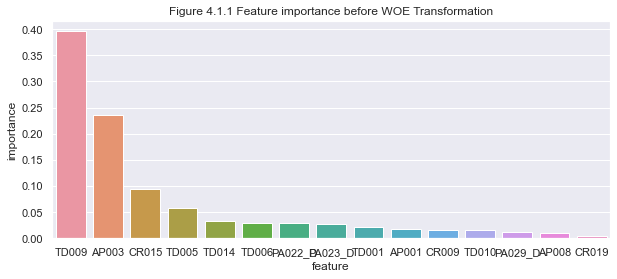

In [70]:
# Plot the feature importance
plt.figure(figsize=(10,4))

sns.barplot(x = 'feature', y = 'importance', data = importances_beforeWOE)
plt.title('Figure 4.1.1 Feature importance before WOE Transformation')

Figure 4.1.1 shows that the impotance of TD009(TD_CNT_QUERY_LAST_3MON_P2P), AP003(CODE_EDUCATION), CR015(MONTH_CREDIT_CARD_MOB_MAX), and TD005(TD_CNT_QUERY_LAST_1MON_P2P) are the most highest in the decision tree model.

#### 4.1.3 Model Prediction

In [71]:
# Value prediction
predictions_beforeWOE = dtree.predict(X_test_beforeWOE)
predictions_beforeWOE

array([0, 0, 0, ..., 0, 0, 0])

In [72]:
# Probability Prediction
y_pred_beforeWOE = dtree.predict_proba(X_test_beforeWOE)[:,1]
y_pred_beforeWOE

array([0.11612176, 0.21557028, 0.15532915, ..., 0.15930599, 0.18986175,
       0.0654102 ])

#### 4.1.4 Model Evaluation
Here we can use MAE, RMSE, and ROC to evaluation the model.

#### Mean Absolute Error (MAE) & Root Mean Squared Error

In [74]:
# Mean Absolute Error (MAE) - Closer to 0, the better
from sklearn.metrics import mean_absolute_error
mae_beforeWOE = mean_absolute_error(Y_test_beforeWOE,y_pred_beforeWOE)

# Root Mean Squared Error - lower is better
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_beforeWOE = sqrt(mean_squared_error(Y_test_beforeWOE,y_pred_beforeWOE))

print("mae_beforeWOE is " + str(round(mae_beforeWOE,2)))
print("rmse_beforeWOE is " + str(round(rmse_beforeWOE,2)))

mae_beforeWOE is 0.31
rmse_beforeWOE is 0.39


#### ROC

In [75]:
from sklearn.metrics import roc_curve, roc_auc_score
roc_auc_value = roc_auc_score(Y_test_beforeWOE,y_pred_beforeWOE)
roc_auc_value

0.6274129327850284

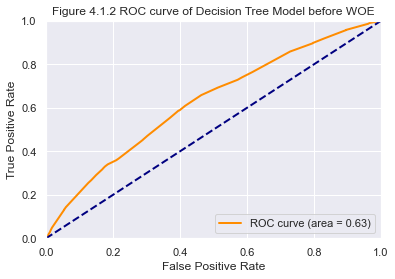

In [76]:
fpr, tpr, _ = roc_curve(Y_test_beforeWOE, y_pred_beforeWOE)
lw=2
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr, color='darkorange',lw=lw,label='ROC curve (area = %0.2f)' %roc_auc_value)
plt.plot([0,1],[0,1], color='navy',lw=lw,linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Figure 4.1.2 ROC curve of Decision Tree Model before WOE')
plt.legend(loc='lower right')
plt.show()

Figure 4.1.2 shows that the AUC is 0.6274, it means there is a 63% chance that the model will be able to distinguish between loan default and no default.

#### [Back to the top](#0)

### 4.2 Decision Tree Model after WOE<a class="anchor" id="42"></a>
#### 4.2.1 Dataset Preparation

In [77]:
# X_train set
features_afterWOE = ['AP001','AP003_WOE','AP008_WOE',
                     'CR009','CR015_WOE','CR019',
                     'PA022_D_WOE','PA023_D_WOE','PA029_D_WOE',
                     'TD001','TD005','TD006','TD009','TD010','TD014']
X_train_afterWOE = train[features_afterWOE]

X_train_afterWOE.head()

,AP001,AP003_WOE,AP008_WOE,CR009,CR015_WOE,CR019,PA022_D_WOE,PA023_D_WOE,PA029_D_WOE,TD001,TD005,TD006,TD009,TD010,TD014
0,24,-0.14,-0.15,0,0.32,3,-0.15,-0.12,-0.13,2,2,1,2,1,1
1,28,-0.14,0.12,28200,0.08,4,-0.15,-0.12,-0.13,1,6,2,12,3,5
2,27,-0.47,0.00,606,-0.28,12,-0.15,-0.12,-0.13,3,3,1,5,2,3
3,31,0.16,-0.10,18000,0.08,12,-0.15,-0.12,-0.13,6,6,1,8,1,1
4,44,0.16,0.12,1500,0.19,3,-0.15,-0.12,-0.13,2,4,1,5,1,1


In [78]:
# Y_train set
Y_train_afterWOE = train['loan_default']
Y_train_afterWOE.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_default, dtype: int64

In [79]:
# X_test set
X_test_afterWOE = test[features_afterWOE]

X_test_afterWOE.head()

,AP001,AP003_WOE,AP008_WOE,CR009,CR015_WOE,CR019,PA022_D_WOE,PA023_D_WOE,PA029_D_WOE,TD001,TD005,TD006,TD009,TD010,TD014
0,28,-0.14,-0.10,5500,0.19,7,0.19,0.24,0.34,2,2,2,2,2,2
1,25,-0.14,0.09,17387,0.19,2,-0.33,-0.33,-0.33,2,5,1,7,1,1
2,39,0.16,0.00,115900,0.08,6,-0.33,-0.33,-0.33,0,2,2,3,2,2
3,28,-0.14,0.12,12100,-0.28,1,-0.33,-0.33,-0.33,4,5,1,6,1,4
4,31,0.16,0.09,51700,0.08,12,-0.33,-0.33,-0.33,0,2,0,7,3,4


In [80]:
# Y_test set
Y_test_afterWOE = test['loan_default']
Y_test_afterWOE.head()

0    0
1    0
2    0
3    0
4    1
Name: loan_default, dtype: int64

#### 4.2.2 Build a decision tree model

In [81]:
from sklearn.tree import DecisionTreeClassifier # for classification

# First, specify the model. 
dtree1 = DecisionTreeClassifier(min_samples_leaf = 5, max_depth = 6)

# Then, train the model.
dtree1.fit(X_train_afterWOE, Y_train_afterWOE)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5)

#### The Importance of the Features

In [99]:
importances_afterWOE = pd.DataFrame({'feature': X_train_afterWOE.columns, 'importance': np.round(dtree1.feature_importances_,3)})
importances_afterWOE = importances_afterWOE.sort_values('importance',ascending=False)
importances_afterWOE.head()

,feature,importance
12,TD009,0.386
1,AP003_WOE,0.224
4,CR015_WOE,0.100
10,TD005,0.057
14,TD014,0.039


Text(0.5, 1.0, 'Figure 4.2.1 Feature importance after WOE Transformation')

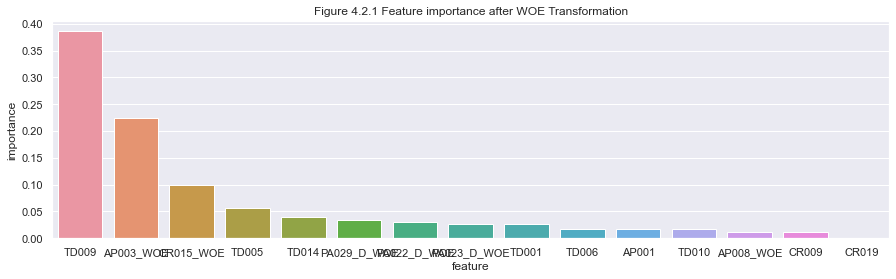

In [85]:
# Plot the feature importance
plt.figure(figsize=(15,4))

sns.barplot(x = 'feature', y = 'importance', data = importances_afterWOE)
plt.title('Figure 4.2.1 Feature importance after WOE Transformation')

Figure 4.2.1 shows that the impotance of TD009(TD_CNT_QUERY_LAST_3MON_P2P), AP003(CODE_EDUCATION), CR015(MONTH_CREDIT_CARD_MOB_MAX), and TD005(TD_CNT_QUERY_LAST_1MON_P2P) are the most highest in the decision tree model.

#### 4.2.3 Model Prediction

In [86]:
# Value prediction
predictions_afterWOE = dtree1.predict(X_test_afterWOE)
predictions_afterWOE

array([0, 0, 0, ..., 0, 0, 0])

In [87]:
# Probability Prediction
y_pred_afterWOE = dtree1.predict_proba(X_test_afterWOE)[:,1]
y_pred_afterWOE

array([0.14678899, 0.21286513, 0.15532915, ..., 0.11788991, 0.23257329,
       0.09836928])

#### 4.2.4 Model Evaluation
Here we can use MAE, RMSE, and ROC to evaluation the model.

#### Mean Absolute Error (MAE) & Root Mean Squared Error

In [90]:
# Mean Absolute Error (MAE) - Closer to 0, the better
from sklearn.metrics import mean_absolute_error
mae_afterWOE = mean_absolute_error(Y_test_afterWOE,y_pred_afterWOE)

# Root Mean Squared Error - lower is better
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_afterWOE = sqrt(mean_squared_error(Y_test_afterWOE,y_pred_afterWOE))

print("mae_beforeWOE: " + str(round(mae_beforeWOE,2)) + " VS mae_afterWOE: " + str(round(mae_afterWOE,2)))
print("rmse_beforeWOE: " + str(round(rmse_beforeWOE,2)) + " VS rmse_afterWOE: " + str(round(rmse_afterWOE,2)))

mae_beforeWOE: 0.31 VS mae_afterWOE: 0.3
rmse_beforeWOE: 0.39 VS rmse_afterWOE: 0.38


The MAE of the model after WOE is 0.3, smaller than that before WOE(0.31). THe RMSE of the model after WOE is 0.38, smaller than that of the model before(0.39). It means that the model has been improved after WOE transformation.

#### ROC

In [93]:
from sklearn.metrics import roc_curve, roc_auc_score
roc_auc_value = roc_auc_score(Y_test_afterWOE,y_pred_afterWOE)
roc_auc_value

0.6339520607353136

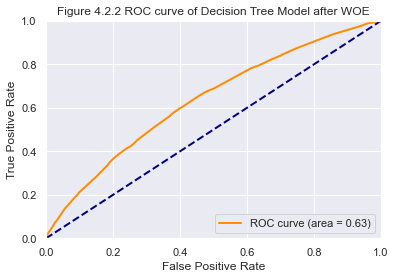

In [94]:
fpr, tpr, _ = roc_curve(Y_test_afterWOE, y_pred_afterWOE)
lw=2
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr, color='darkorange',lw=lw,label='ROC curve (area = %0.2f)' %roc_auc_value)
plt.plot([0,1],[0,1], color='navy',lw=lw,linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Figure 4.2.2 ROC curve of Decision Tree Model after WOE')
plt.legend(loc='lower right')
plt.show()

Figure 4.2.2 shows that the AUC is 0.6340, which is slightly higher than the AUC of the firt model. It means the probability for the second model to distinguish between loan default and no default is slightly higher than the first model. 

#### [Back to the top](#0)

## 5. Conclusion <a class="anchor" id="5"></a>
Describe why your feature transformation enhanced your model. Use a metric such as the standard ROC to show your model improvement. You do not need to perform the gains table or lift.

### Why WOE Transformation Enhanced the Model
WOE Transformation gets the maximum difference among the binned categories relating to the target variable(loan default). It tells the predictive power of every bin/category of a feature. The model has been enhanced after WOE according to the increased AUC(from 0.6274 to 0.6340).  
The reason for the improvement is that WOE transformation avoid the mathamatical meaning of the categories of the features by creating a new feature and replacing each bin with its WoE value. For example, feature AP003(Education) have 6 levels(1 to 6), but the numbers are just labels of education levels without any mathamatical meaning. WOE can avoid the protential influence from the numeric labels to the models. 

### Insights of Features and Models

In [102]:
importances_afterWOE.head(8)

,feature,importance
12,TD009,0.386
1,AP003_WOE,0.224
4,CR015_WOE,0.100
10,TD005,0.057
14,TD014,0.039
8,PA029_D_WOE,0.034
6,PA022_D_WOE,0.031
7,PA023_D_WOE,0.027


From the importance of features, we know that TD009, AP003_WOE, CR015_WOE, TD005, TD014, and the call detail variables are important features in the decision tree model.

 - **TD009(TD_CNT_QUERY_LAST_3MON_P2P) and TD005(TD_CNT_QUERY_LAST_1MON_P2P)**: TD009 is the amount of track-data query for P2P in last 3 months. TD005 is the amount of track-data query for P2P in last 1 month. EDA shows that the probability to be loan fault goes higher as the amount of TD query for P2P in last 1/3 months goes higher in general. 
 - **AP003_WOE(CODE_EDUCATION)**: AP003 is the education level/code of applicants.  According to the EDA, most of the applicants reach education level 1 and the other reach education level 3&4. 
 - **CR015_WOE(MONTH_CREDIT_CARD_MOB_MAX)**: CR015 represents max MOB in a month. EDA shows that most of MONTH_CREDIT_CARD_MOB_MAX is in level 5 and followed by level 6;
 - **The Call Detail Variables**:PA022 is the days between application and first collection or high risk call; PA023 is the days between the application and the first collection call; PA029 is the average length of collection or high risk inbound calls. EDA shows that the probability to be loan default were around 20% when the interval is under certain days. When the interval goes higher, the probability to be loan default can be extrme high.

#### [Back to the top](#0)